In [1]:
!head -5 day.csv

instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.2,0.212122,0.590435,0.160296,108,1454,1562


In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import warnings
warnings.filterwarnings('ignore')

#day.csvをデータフレームに取り込み
#日付を表す列は parse_dates で指定する
df = pd.read_csv('day.csv', parse_dates=[1])

#データ属性の確認
print(df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [3]:
#instantは連番で予測不能なので削除
df = df.drop('instant', axis=1)

#項目名の日本語化
columns = [
    '日付', '季節', '年', '月', '祝日', '曜日', '勤務日', '天気',
    '気温', '体感温度', '湿度', '風速', '臨時ユーザー利用数',
    '登録ユーザー利用数', '全体ユーザー利用数'
]

#項目名を日本語に置き換え
df.columns = columns

In [4]:
#先頭５行の確認
display(df.head())

#最終５行の確認
display(df.tail())

,日付,季節,年,月,祝日,曜日,勤務日,天気,気温,体感温度,湿度,風速,臨時ユーザー利用数,登録ユーザー利用数,全体ユーザー利用数
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


,日付,季節,年,月,祝日,曜日,勤務日,天気,気温,体感温度,湿度,風速,臨時ユーザー利用数,登録ユーザー利用数,全体ユーザー利用数
726,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


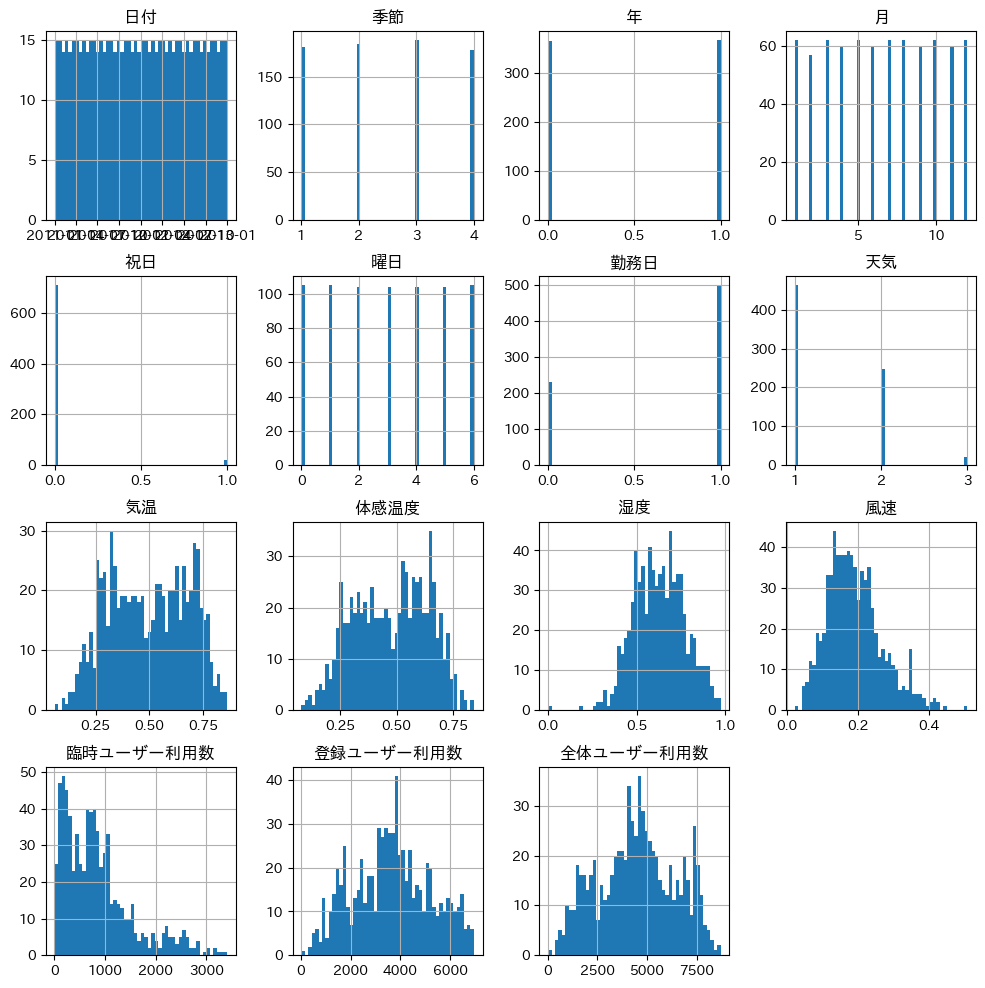

In [8]:
#データのヒストグラム表示
#度数分布表示

#グラフのサイズ調整
from pylab import rcParams
rcParams['figure.figsize'] = (12,12)

#データフレームの数値項目でヒストグラム表示
df.hist(bins=50)
plt.show()

In [9]:
#欠損値チェック
df.isnull().sum()

日付           0
季節           0
年            0
月            0
祝日           0
曜日           0
勤務日          0
天気           0
気温           0
体感温度         0
湿度           0
風速           0
臨時ユーザー利用数    0
登録ユーザー利用数    0
全体ユーザー利用数    0
dtype: int64

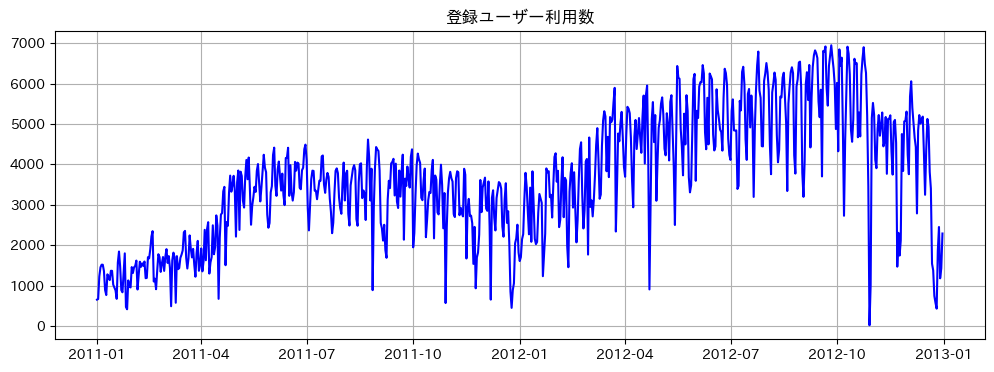

In [10]:
#時系列グラフの描画(登録ユーザー利用数)
plt.figure(figsize=(12,4))

#グラフ描画
plt.plot(df['日付'],df['登録ユーザー利用数'],c='b')

#方眼表示
plt.grid()
plt.title('登録ユーザー利用数')

#画面出力
plt.show()

In [12]:
#入力データと正解データへの分割
#x(入力データ),y(正解データ)へ分割する
x = df.drop(['日付', '臨時ユーザー利用数', '登録ユーザー利用数',
         '全体ユーザー利用数'], axis=1)
y = df['登録ユーザー利用数'].values

In [15]:
#分割日mdayの設定
mday = pd.to_datetime('2012-11-1')

#訓練用index と 検証用indexを作る
train_index = df['日付'] < mday
test_index = df['日付'] >= mday

#入力データの分割
x_train = x[train_index]
x_test = x[test_index]

#yも同様に分割
y_train = y[train_index]
y_test = y[test_index]

#日付データの分割(グラフ表示用)
dates_test = df['日付'][test_index]

In [16]:
#結果確認(サイズを確認)
print(x_train.shape)
print(x_test.shape)

#結果確認(境界値を重点的に)
display(x_train.tail())
display(x_test.head())

(670, 11)
(61, 11)


,季節,年,月,祝日,曜日,勤務日,天気,気温,体感温度,湿度,風速
665,4,1,10,0,6,0,2,0.530000,0.515133,0.720000,0.235692
666,4,1,10,0,0,0,2,0.477500,0.467771,0.694583,0.398008
667,4,1,10,0,1,1,3,0.440000,0.439400,0.880000,0.358200
668,4,1,10,0,2,1,2,0.318182,0.309909,0.825455,0.213009
669,4,1,10,0,3,1,2,0.357500,0.361100,0.666667,0.166667


,季節,年,月,祝日,曜日,勤務日,天気,気温,体感温度,湿度,風速
670,4,1,11,0,4,1,2,0.365833,0.369942,0.581667,0.157346
671,4,1,11,0,5,1,1,0.355000,0.356042,0.522083,0.266175
672,4,1,11,0,6,0,2,0.343333,0.323846,0.491250,0.270529
673,4,1,11,0,0,0,1,0.325833,0.329538,0.532917,0.179108
674,4,1,11,0,1,1,1,0.319167,0.308075,0.494167,0.236325


In [20]:
#アルゴリズム選択
# XGBRegressor を選択する
from xgboost import XGBRegressor
algorithm = XGBRegressor(objective='reg:squarederror',
                         random_state=random_seed)

In [21]:
#登録ユーザー利用数予測モデルの学習と予測

#学習
algorithm.fit(x_train, y_train)

#予測
y_pred = algorithm.predict(x_test)

#予測結果確認
print(y_pred[:5])

[4927.806  4889.2686 3571.434  3637.8308 4719.999 ]


In [22]:
#評価(登録ユーザー利用数)

#score関数の呼び出し
score = algorithm.score(x_test, y_test)

#R2値の計算
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred)

#結果確認
print(f'score: {score:.4f} r2_score: {r2_score:.4f}')

score: 0.4206 r2_score: 0.4206


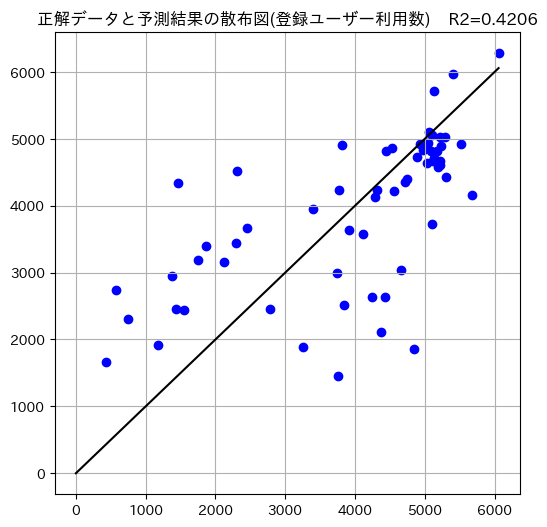

In [23]:
#正解データと予測結果を散布図で比較(登録ユーザー利用数)
plt.figure(figsize=(6,6))
y_max = y_test.max()
plt.plot((0, y_max), (0,y_max), c='k')
plt.scatter(y_test, y_pred, c='b')
plt.title(f'正解データと予測結果の散布図(登録ユーザー利用数)\
    R2={score:.4f}')
plt.grid()
plt.show()

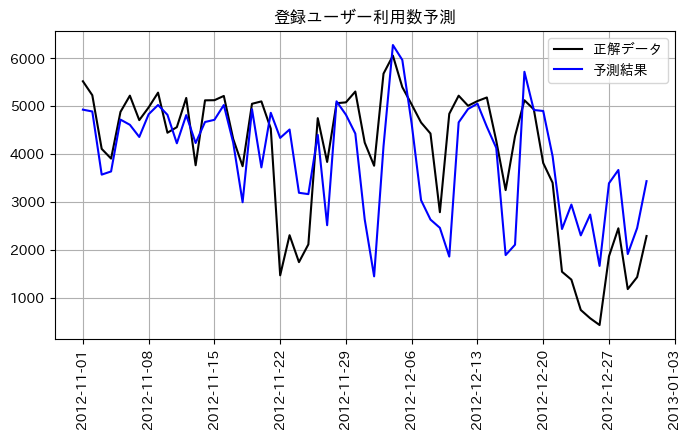

In [24]:
#時系列グラフの描画(登録ユーザー利用数)
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(8,4))

#グラフ描画
ax.plot(dates_test, y_test, label='正解データ', c='k')
ax.plot(dates_test, y_pred, label='予測結果', c='b')

#日付目盛り間隔
#木曜日ごとに日付を表示
weeks = mdates.WeekdayLocator(byweekday=mdates.TH)
ax.xaxis.set_major_locator(weeks)

#日付表記を90度回転
ax.tick_params(axis='x', rotation=90)

#方眼表示など
ax.grid()
ax.legend()
ax.set_title('登録ユーザー利用数予測')

#画面出力
plt.show()

In [25]:
#項目をOne-Hotエンコーディングするための関数
def enc(df, column):
    df_dummy = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df.drop([column], axis=1), df_dummy], axis=1)
    return df

#項目「月」「季節」をOne-Hotエンコーディングする

x2 = x.copy()
x2 = enc(x2, '月')
x2 = enc(x2, '季節')

#結果確認
display(x2.head())

,年,祝日,曜日,勤務日,天気,気温,体感温度,湿度,風速,月_1,...,月_7,月_8,月_9,月_10,月_11,月_12,季節_1,季節_2,季節_3,季節_4
0,0,0,6,0,2,0.344167,0.363625,0.805833,0.160446,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,2,0.363478,0.353739,0.696087,0.248539,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1,...,0,0,0,0,0,0,1,0,0,0
3,0,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1,...,0,0,0,0,0,0,1,0,0,0


In [28]:
#分割日mdayの設定
mday = pd.to_datetime('2012-11-1')

#訓練用index と 検証用indexを作る
train_index = df['日付'] < mday
test_index = df['日付'] >= mday

#入力データの分割
x_train = x2[train_index]
x_test = x2[test_index]

#yも同様に分割
y_train = y[train_index]
y_test = y[test_index]

#日付データの分割(グラフ表示用)
dates_test = df['日付'][test_index]

In [29]:
#結果確認(サイズを確認)
print(x_train.shape)
print(x_test.shape)

#結果確認(境界値を重点的に)
display(x_train.tail())
display(x_test.head())

(670, 25)
(61, 25)


,年,祝日,曜日,勤務日,天気,気温,体感温度,湿度,風速,月_1,...,月_7,月_8,月_9,月_10,月_11,月_12,季節_1,季節_2,季節_3,季節_4
665,1,0,6,0,2,0.530000,0.515133,0.720000,0.235692,0,...,0,0,0,1,0,0,0,0,0,1
666,1,0,0,0,2,0.477500,0.467771,0.694583,0.398008,0,...,0,0,0,1,0,0,0,0,0,1
667,1,0,1,1,3,0.440000,0.439400,0.880000,0.358200,0,...,0,0,0,1,0,0,0,0,0,1
668,1,0,2,1,2,0.318182,0.309909,0.825455,0.213009,0,...,0,0,0,1,0,0,0,0,0,1
669,1,0,3,1,2,0.357500,0.361100,0.666667,0.166667,0,...,0,0,0,1,0,0,0,0,0,1


,年,祝日,曜日,勤務日,天気,気温,体感温度,湿度,風速,月_1,...,月_7,月_8,月_9,月_10,月_11,月_12,季節_1,季節_2,季節_3,季節_4
670,1,0,4,1,2,0.365833,0.369942,0.581667,0.157346,0,...,0,0,0,0,1,0,0,0,0,1
671,1,0,5,1,1,0.355000,0.356042,0.522083,0.266175,0,...,0,0,0,0,1,0,0,0,0,1
672,1,0,6,0,2,0.343333,0.323846,0.491250,0.270529,0,...,0,0,0,0,1,0,0,0,0,1
673,1,0,0,0,1,0.325833,0.329538,0.532917,0.179108,0,...,0,0,0,0,1,0,0,0,0,1
674,1,0,1,1,1,0.319167,0.308075,0.494167,0.236325,0,...,0,0,0,0,1,0,0,0,0,1


In [30]:
#登録ユーザー利用数予測モデルの学習と予測

#学習
algorithm.fit(x_train, y_train)

#予測
y_pred = algorithm.predict(x_test)

#予測結果確認
print(y_pred[:5])

[4654.571  4324.7354 3174.4817 3028.7585 4276.959 ]


In [31]:
#評価(登録ユーザー利用数)

#score関数の呼び出し
score = algorithm.score(x_test, y_test)

#R2値の計算
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred)

#結果確認
print(f'score: {score:.4f} r2_score: {r2_score:.4f}')

score: 0.5099 r2_score: 0.5099


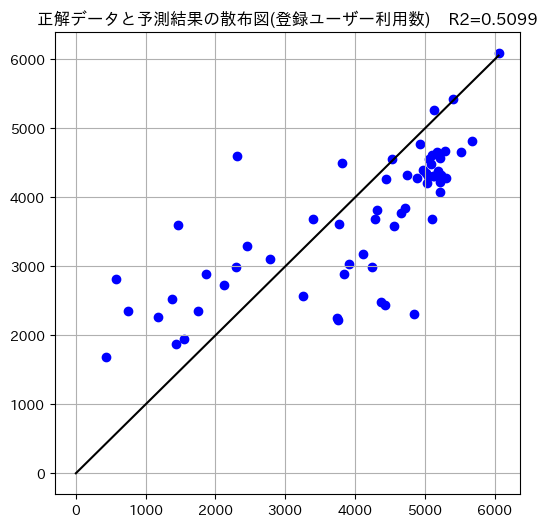

In [32]:
#正解データと予測結果を散布図で比較(登録ユーザー利用数)
plt.figure(figsize=(6,6))
y_max = y_test.max()
plt.plot((0, y_max), (0,y_max), c='k')
plt.scatter(y_test, y_pred, c='b')
plt.title(f'正解データと予測結果の散布図(登録ユーザー利用数)\
    R2={score:.4f}')
plt.grid()
plt.show()

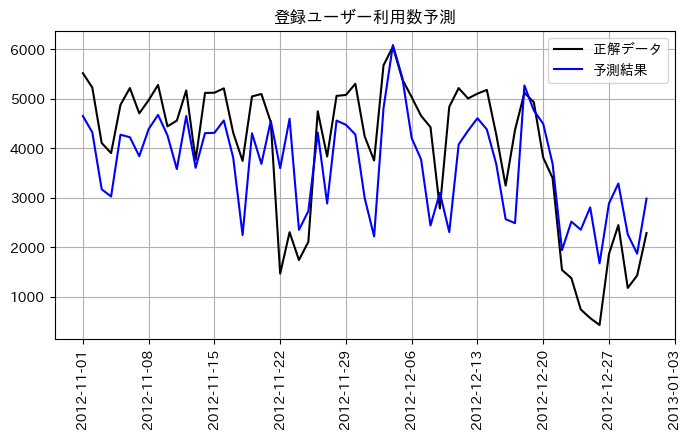

In [33]:
#時系列グラフの描画(登録ユーザー利用数)
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(8,4))

#グラフ描画
ax.plot(dates_test, y_test, label='正解データ', c='k')
ax.plot(dates_test, y_pred, label='予測結果', c='b')

#日付目盛り間隔
#木曜日ごとに日付を表示
weeks = mdates.WeekdayLocator(byweekday=mdates.TH)
ax.xaxis.set_major_locator(weeks)

#日付表記を90度回転
ax.tick_params(axis='x', rotation=90)

#方眼表示など
ax.grid()
ax.legend()
ax.set_title('登録ユーザー利用数予測')

#画面出力
plt.show()

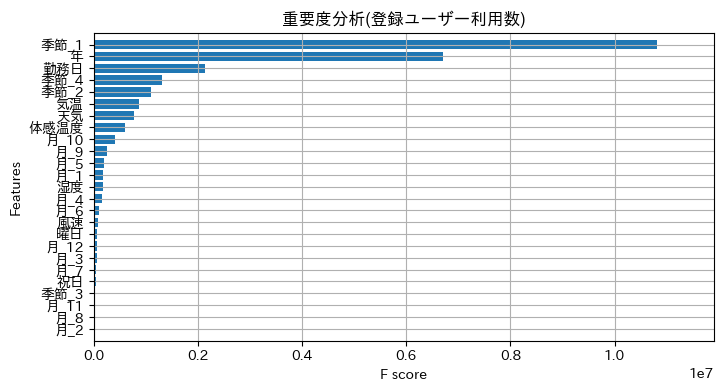

In [34]:
#登録ユーザー利用数に対する重要度分析
import xgboost as xgb
fig, ax = plt.subplots(figsize=(8,4))
xgb.plot_importance(algorithm, ax=ax, height=0.8,
        importance_type='gain', show_values=False,
        title='重要度分析(登録ユーザー利用数)')
plt.show()

In [35]:
#先頭５行の確認
display(df.head())

#最終５行の確認
display(df.tail())

,日付,季節,年,月,祝日,曜日,勤務日,天気,気温,体感温度,湿度,風速,臨時ユーザー利用数,登録ユーザー利用数,全体ユーザー利用数
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


,日付,季節,年,月,祝日,曜日,勤務日,天気,気温,体感温度,湿度,風速,臨時ユーザー利用数,登録ユーザー利用数,全体ユーザー利用数
726,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [36]:
#「日付」と「登録ユーザー利用数」のみ抽出し、
#列名を日付:ds, 登録ユーザー利用数:y に置き換えたデータフレームdf2を作る

#データフレーム全体のコピー
df2 = df.copy()

#「日付」「登録ユーザー利用数」列の抽出
df2 = df2[['日付', '登録ユーザー利用数']]

#列名の置き換え
df2.columns = ['ds', 'y']

#結果確認
display(df2.head())

,ds,y
0,2011-01-01,654
1,2011-01-02,670
2,2011-01-03,1229
3,2011-01-04,1454
4,2011-01-05,1518


In [37]:
#分割日mdayの設定
mday = pd.to_datetime('2012-11-1')

#訓練用indexと検証用indexを作る
train_index = df2['ds'] < mday
test_index = df2['ds'] >= mday

#入力データの分割
x_train = df2[train_index]
x_test = df2[test_index]

#日付データの分割(グラフ表示用)
dates_test = df2['ds'][test_index]

In [38]:
#ライブラリのインポート
from fbprophet import Prophet

#モデル選択
#3つのseasonalityパラメータの設定が必要
#今回のデータの場合、日単位のデータなのでdaily_seasonalityは不要
#weekly_seasonality/daily_seasonalityは
#True/Falseの他に数値で指定することも可能(三角関数の個数)
#seasonality_mode: additive(デフォルト) multiplicative

m1 = Prophet(yearly_seasonality=True, weekly_seasonality=True,
     daily_seasonality=False, seasonality_mode='multiplicative')

ModuleNotFoundError: No module named 'fbprophet'